# <center>Wi-Fi Signal Strength → Location Prediction</center>
## <center> EDA & Visualization </center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [3]:
train_df = pd.read_csv('trainingData.csv')
train_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
WAPdf = train_df.iloc[:,:520]
WAPdf.head()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [5]:
Info_df = train_df.iloc[:,520:]
Info_df.head()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
WAPdf.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,84.974921,99.866881,98.881276,98.833325,99.436525,73.705673,59.889803,99.788634,99.970507,100.0
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,50.099899,5.023663,14.206023,14.634613,10.259137,62.278292,74.060259,6.360671,2.404232,0.0
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,-103.000000,-97.000000,-92.000000,-90.000000,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,100.0
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [7]:
Info_df.describe()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [8]:
WAPdf.isnull().sum()

WAP001    0
WAP002    0
WAP003    0
WAP004    0
WAP005    0
         ..
WAP516    0
WAP517    0
WAP518    0
WAP519    0
WAP520    0
Length: 520, dtype: int64

In [9]:
Info_df.isnull().sum()

LONGITUDE           0
LATITUDE            0
FLOOR               0
BUILDINGID          0
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
dtype: int64

In [10]:
signal_strength = WAPdf.values.flatten()
signal_strength.shape


(10367240,)

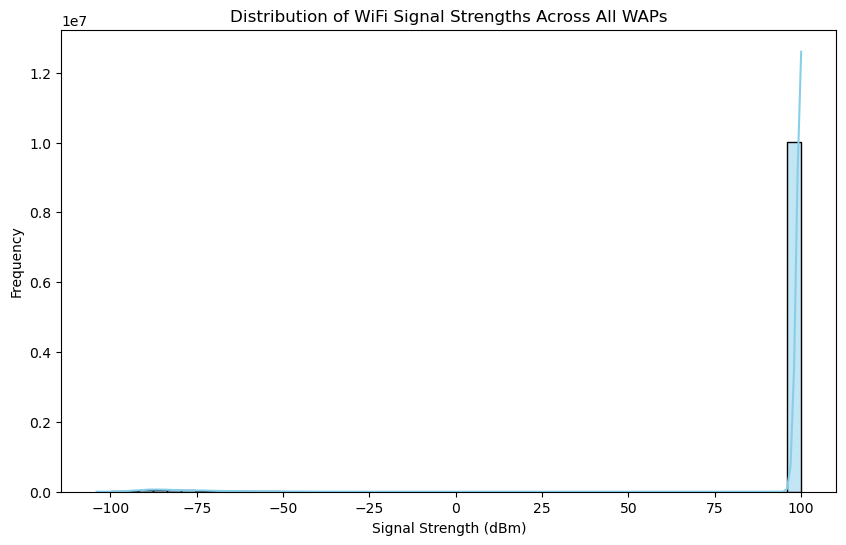

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(signal_strength, bins=50, color='skyblue', kde=True)
plt.title("Distribution of WiFi Signal Strengths Across All WAPs")
plt.xlabel("Signal Strength (dBm)")
plt.ylabel("Frequency")
plt.show()

In [12]:
signal_strength_filtered = WAPdf.values.flatten()
signal_strength_filtered = signal_strength_filtered[signal_strength_filtered != 100]
signal_strength_filtered.shape

(358763,)

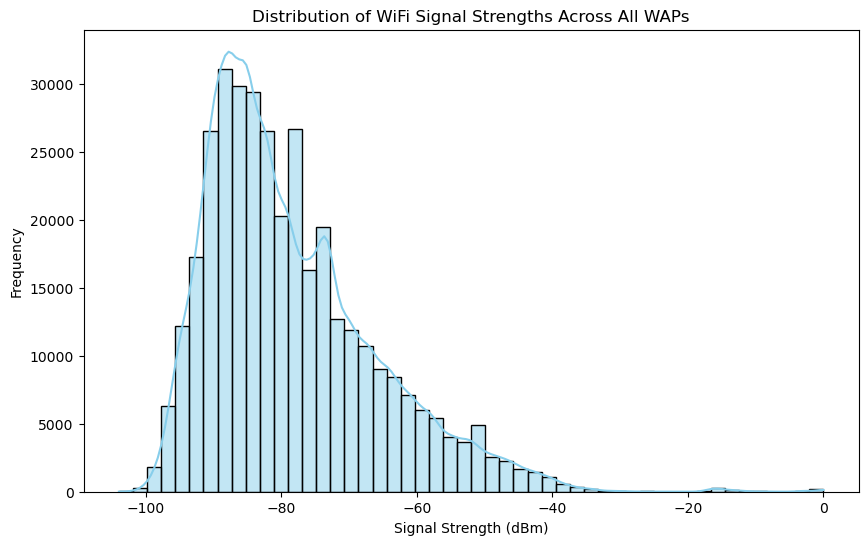

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(signal_strength_filtered, bins=50, color='skyblue', kde=True)
plt.title("Distribution of WiFi Signal Strengths Across All WAPs")
plt.xlabel("Signal Strength (dBm)")
plt.ylabel("Frequency")
plt.show()

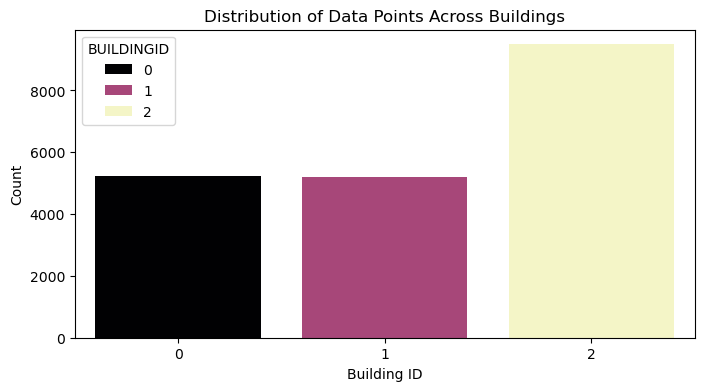

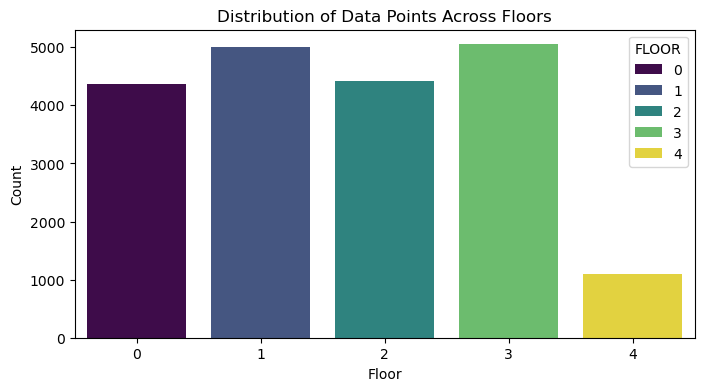

In [14]:
# Plotting BUILDINGID distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=Info_df, x='BUILDINGID', palette='magma', hue='BUILDINGID')
plt.title("Distribution of Data Points Across Buildings")
plt.xlabel("Building ID")
plt.ylabel("Count")
plt.show()


# Plotting FLOOR distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=Info_df, x='FLOOR', palette='viridis', hue='FLOOR')
plt.title("Distribution of Data Points Across Floors")
plt.xlabel("Floor")
plt.ylabel("Count")
plt.show()


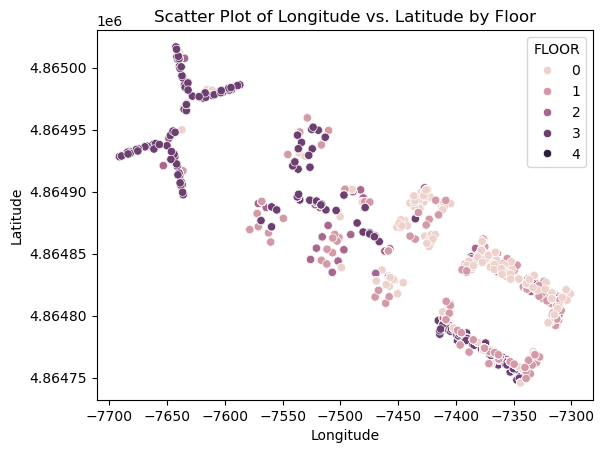

In [15]:
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=Info_df, hue='FLOOR')
plt.title('Scatter Plot of Longitude vs. Latitude by Floor')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

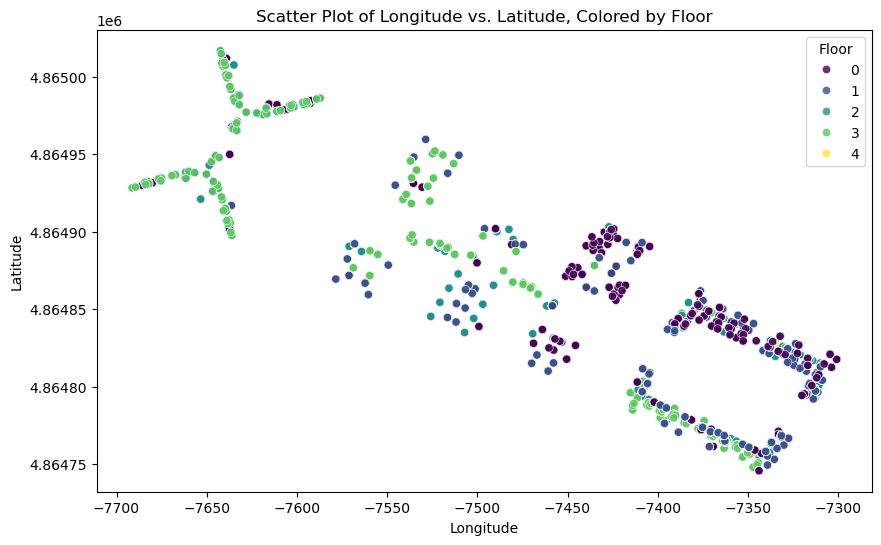

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['LONGITUDE'], y=train_df['LATITUDE'], hue=train_df['FLOOR'], palette="viridis", alpha=0.8)

plt.title('Scatter Plot of Longitude vs. Latitude, Colored by Floor')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Floor')
plt.show()

C:\Users\nihal\AppData\Local\Temp\ipykernel_20788\1664582675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df["BUILDINGID"], y=train_df["Mean_Signal_Strength"], palette="coolwarm")


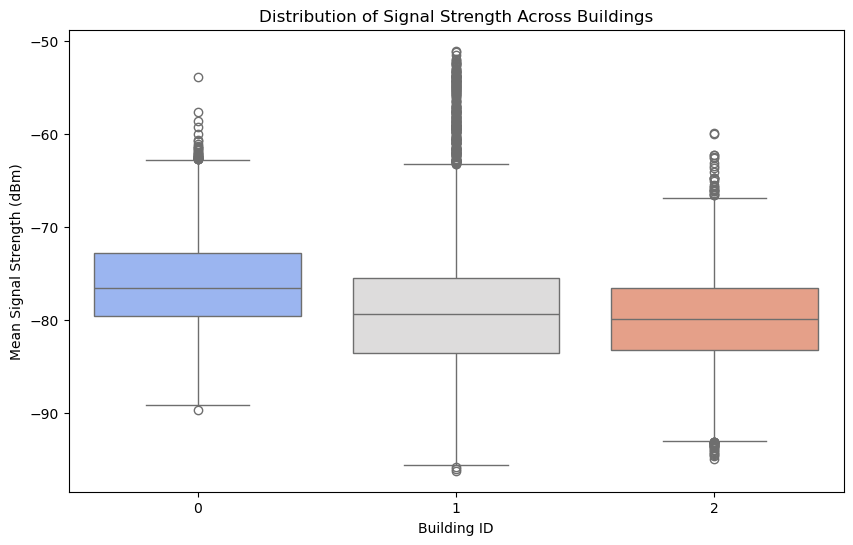

In [17]:

# Select only WAP columns (first 520 columns)
wap_columns = train_df.iloc[:, :520]

# Replace '100' (no signal) with NaN
wap_columns = wap_columns.replace(100, np.nan)

# Compute the mean signal strength for each row
train_df["Mean_Signal_Strength"] = wap_columns.mean(axis=1)

# Box plot of signal strength by Building ID
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df["BUILDINGID"], y=train_df["Mean_Signal_Strength"], palette="coolwarm")

plt.title('Distribution of Signal Strength Across Buildings')
plt.xlabel('Building ID')
plt.ylabel('Mean Signal Strength (dBm)')
plt.show()


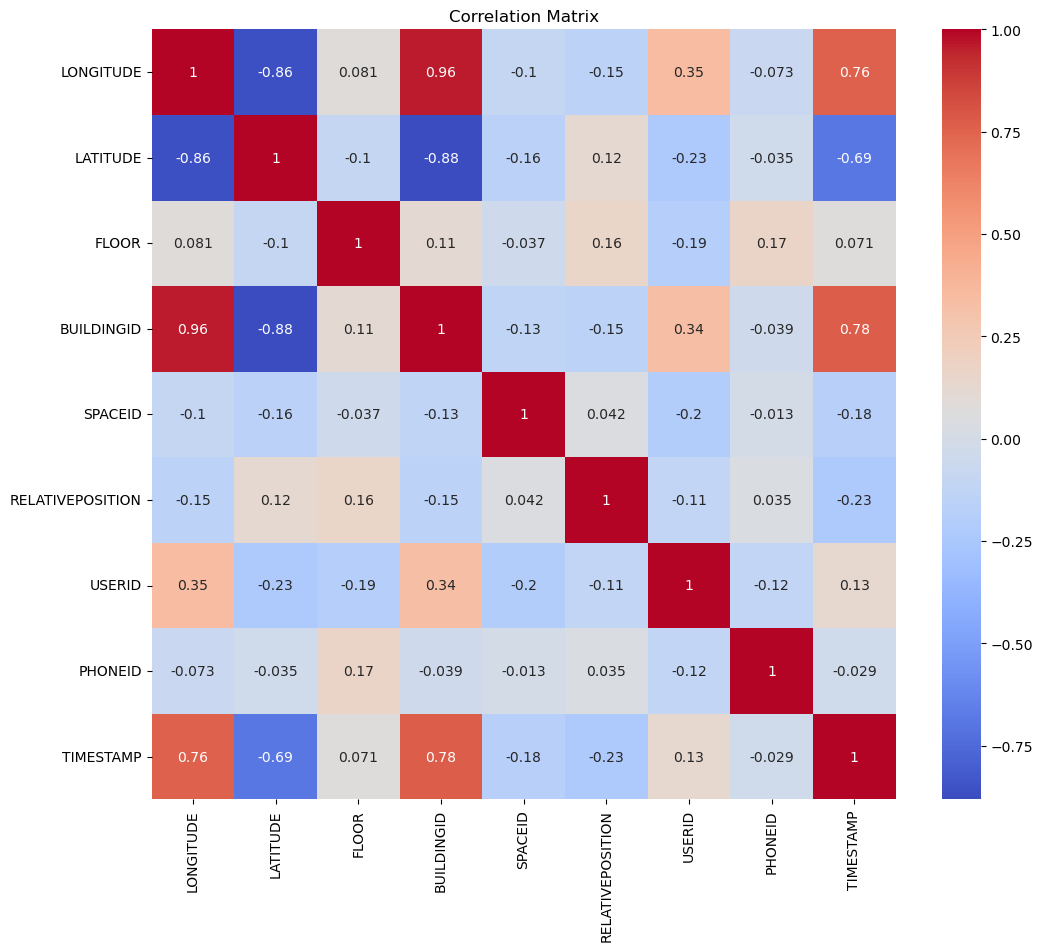

In [18]:
corr_matrix = Info_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Training


## k-Nearest Neighbors Regressor 

Predicting exact geographical coordinates (Longitude and Latitude) using k-Nearest Neighbors Regressor with PCA dimensionality reduction.  

Features: WAP signal strengths  
Target: LONGITUDE, LATITUDE  
Preprocessing: Standard scaling and PCA reduction to 100 components  
Evaluation metrics: RMSE and MAE  

In [20]:
test_df = pd.read_csv('validationData.csv')
test_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [21]:
X_train = train_df.iloc[: , :520]
y_train_long = train_df['LONGITUDE']
y_train_lat = train_df['LATITUDE']

X_test = test_df.iloc[:, :520]
y_test_long = test_df['LONGITUDE']
y_test_lat = test_df['LATITUDE']

X_train = X_train.replace(100, -105)
X_test = X_test.replace(100, -105)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data using the same scaler

pca = PCA(n_components=0.95)  # Alternatively, use a fixed number like n_components=50
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# For longitude prediction
knn_long = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_long.fit(X_train_pca, y_train_long)
long_pred = knn_long.predict(X_test_pca)

# For latitude prediction
knn_lat = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_lat.fit(X_train_pca, y_train_lat)
lat_pred = knn_lat.predict(X_test_pca)

# Evaluate model performance
rmse_long = np.sqrt(mean_squared_error(y_test_long, long_pred))
mae_long = mean_absolute_error(y_test_long, long_pred)

rmse_lat = np.sqrt(mean_squared_error(y_test_lat, lat_pred))
mae_lat = mean_absolute_error(y_test_lat, lat_pred)

print(f"Longitude - RMSE: {rmse_long:.4f}, MAE: {mae_long:.4f}")
print(f"Latitude - RMSE: {rmse_lat:.4f}, MAE: {mae_lat:.4f}")

Longitude - RMSE: 15.8498, MAE: 7.4910
Latitude - RMSE: 14.7242, MAE: 7.5890


## HyperParameter Tuning 

In [22]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# For longitude
grid_search_long = GridSearchCV(
    KNeighborsRegressor(), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_long.fit(X_train_pca, y_train_long)

# For latitude
grid_search_lat = GridSearchCV(
    KNeighborsRegressor(), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lat.fit(X_train_pca, y_train_lat)

# Best parameters
print("Best parameters for longitude prediction:", grid_search_long.best_params_)
print("Best parameters for latitude prediction:", grid_search_lat.best_params_)

# Use best models for final prediction
best_knn_long = grid_search_long.best_estimator_
best_knn_lat = grid_search_lat.best_estimator_

long_pred_tuned = best_knn_long.predict(X_test_pca)
lat_pred_tuned = best_knn_lat.predict(X_test_pca)

# Evaluate tuned models
rmse_long_tuned = np.sqrt(mean_squared_error(y_test_long, long_pred_tuned))
mae_long_tuned = mean_absolute_error(y_test_long, long_pred_tuned)

rmse_lat_tuned = np.sqrt(mean_squared_error(y_test_lat, lat_pred_tuned))
mae_lat_tuned = mean_absolute_error(y_test_lat, lat_pred_tuned)

print(f"Tuned Longitude - RMSE: {rmse_long_tuned:.4f}, MAE: {mae_long_tuned:.4f}")
print(f"Tuned Latitude - RMSE: {rmse_lat_tuned:.4f}, MAE: {mae_lat_tuned:.4f}")

Best parameters for longitude prediction: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Best parameters for latitude prediction: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Tuned Longitude - RMSE: 15.1336, MAE: 7.6956
Tuned Latitude - RMSE: 14.7242, MAE: 7.5890


## Cross-Validation

In [23]:
# Cross-validation for longitude model
cv_scores_long = cross_val_score(
    best_knn_long, 
    X_train_pca, 
    y_train_long, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

# Cross-validation for latitude model
cv_scores_lat = cross_val_score(
    best_knn_lat, 
    X_train_pca, 
    y_train_lat, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

# Convert negative MSE to RMSE
rmse_cv_long = np.sqrt(-cv_scores_long)
rmse_cv_lat = np.sqrt(-cv_scores_lat)

# Display results
print(f"Longitude CV RMSE: {rmse_cv_long.mean():.4f} ± {rmse_cv_long.std():.4f}")
print(f"Latitude CV RMSE: {rmse_cv_lat.mean():.4f} ± {rmse_cv_lat.std():.4f}")


Longitude CV RMSE: 16.9378 ± 6.6267
Latitude CV RMSE: 13.7355 ± 8.0060


## Advanced Regression Model: Multi-Layer Perceptron Regressor (MLP)

    

In [51]:
# Scale the target variables
y_scaler_long = StandardScaler()
y_scaler_lat = StandardScaler()
y_train_long_scaled = y_scaler_long.fit_transform(y_train_long.values.reshape(-1, 1)).flatten()
y_train_lat_scaled = y_scaler_lat.fit_transform(y_train_lat.values.reshape(-1, 1)).flatten()

# Create the neural network model with improved parameters
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(50, 25),  # Simpler architecture
    activation='relu',
    solver='adam',
    alpha=0.1,  # Increased regularization
    learning_rate_init=0.001,  # Explicitly set learning rate
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

# Train the model for longitude
mlp_long = MLPRegressor(**mlp_regressor.get_params())
mlp_long.fit(X_train_pca, y_train_long_scaled)

# Train the model for latitude
mlp_lat = MLPRegressor(**mlp_regressor.get_params())
mlp_lat.fit(X_train_pca, y_train_lat_scaled)

# Make predictions and inverse transform to get original scale
long_pred_nn_scaled = mlp_long.predict(X_test_pca)
lat_pred_nn_scaled = mlp_lat.predict(X_test_pca)

long_pred_nn = y_scaler_long.inverse_transform(long_pred_nn_scaled.reshape(-1, 1)).flatten()
lat_pred_nn = y_scaler_lat.inverse_transform(lat_pred_nn_scaled.reshape(-1, 1)).flatten()

# Evaluate
rmse_long_nn = np.sqrt(mean_squared_error(y_test_long, long_pred_nn))
mae_long_nn = mean_absolute_error(y_test_long, long_pred_nn)
rmse_lat_nn = np.sqrt(mean_squared_error(y_test_lat, lat_pred_nn))
mae_lat_nn = mean_absolute_error(y_test_lat, lat_pred_nn)

print(f"Neural Network - Longitude RMSE: {rmse_long_nn:.4f}, MAE: {mae_long_nn:.4f}")
print(f"Neural Network - Latitude RMSE: {rmse_lat_nn:.4f}, MAE: {mae_lat_nn:.4f}")

Neural Network - Longitude RMSE: 22.8015, MAE: 12.0640
Neural Network - Latitude RMSE: 17.8244, MAE: 8.7027


In [12]:
!pip install torch
!pip install torchmetrics
!pip install keras
!pip install keras_tuner
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 3.7 MB/s eta 0:01:41
   ---------------------------------------- 2.1/376.0 MB 5.3 MB/s eta 0:01:11
   ---------------------------------------- 4.5/376.0 MB 7.3 MB/s eta 0:00:52
    --------------------------------------- 6.0/376.0 MB 8.0 MB/s eta 0:00:47
    --------------------------------------- 8.4/376.0 MB 8.4 MB/s eta 0:00:44
    --------------------------------------- 8.7/376.0 MB 8.3 MB/s eta 0:00:45
   - -------------------------------------- 12.6/376.0 MB 8.8 MB/s eta 0:00:42
   - -------------------------------------- 14.9/376.0 MB 9.1 MB/s eta 0:00:40
   - -------------------------------------- 16.5/376.0 MB 9.0 MB/s eta 0:00:41
   -- ------------------------------------- 18.9/376.0 MB 9.2 MB/s eta 0:00:39
   -- ------------------------------------- 21.2/376.0 MB 9.5 MB/s eta 0:0

In [13]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


## Basic Model - Classification DECISION TREE 



- **Task**: Predict `BUILDINGID` (0, 1, 2) and `FLOOR` (0, 1, 2, 3, 4).
- **Features**: WAP signal strengths (WAP001 to WAP520).
- **Basic Method**: Used Decision Tree Classifier with standard scaling and PCA (267 components).
- **Hyperparameter Tuning (Decision Tree)**: Grid search for `max_depth`, `min_samples_split`, `min_samples_leaf`, `criterion`.
- **Advanced Model**: CNN.
  - **Hyperparameter Tuning (CNN)**: Random search for `filters` (16, 32, 64, 128), `dropout` (0.2, 0.3, 0.4), `dense units` (64, 128, 256), `learning rate` (0.001, 0.0005, 0.0001).
  - **Results**: Building Accuracy: 0.9985, Floor Accuracy: 0.9915.
- **Evaluation Metrics**: Accuracy and F1-scores (Decision Tree Building: 0.9764, Floor: 0.9413; F1-Scores: Building 1.00, Floor 0.96, 0.94, 0.92, 0.94, 0.69).

In [14]:
# ===== 1. Load Data =====
df = pd.read_csv("trainingData.csv")
val_df = pd.read_csv("validationData.csv")

# ===== 2. Preprocessing (Standardization & PCA) =====
wap_cols = [col for col in df.columns if col.startswith('WAP')]  # Selecting WAP columns
X = df[wap_cols].replace(100, -110)  # Replace "no signal" (100) with -110
y_building = df["BUILDINGID"]  # Target for Building classification
y_floor = df["FLOOR"]  # Target for Floor classification

X_val = val_df[wap_cols].replace(100, -110)
y_val_building = val_df["BUILDINGID"]
y_val_floor = val_df["FLOOR"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(X_val)  # Apply same scaling to validation set

# PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_val_pca = pca.transform(X_val_scaled)

print(f"Original shape: {X.shape}, After PCA: {X_pca.shape}")


Original shape: (19937, 520), After PCA: (19937, 267)


In [15]:
# ===== 3. Train-Test Split =====
X_train_building, X_test_building, y_train_building, y_test_building = train_test_split(
    X_pca, y_building, test_size=0.2, random_state=42, stratify=y_building
)

X_train_floor, X_test_floor, y_train_floor, y_test_floor = train_test_split(
    X_pca, y_floor, test_size=0.2, random_state=42, stratify=y_floor
)



## Train Decision Tree for BUILDINGID

In [16]:
# ===== 4. Train Decision Tree for BUILDINGID =====
dt_building = DecisionTreeClassifier(random_state=42)
dt_building.fit(X_train_building, y_train_building)

y_pred_building = dt_building.predict(X_test_building)

# Evaluation
print("\n=== Building Classification Report ===")
print(classification_report(y_test_building, y_pred_building))
print("Decision Tree Accuracy - Building ID:", accuracy_score(y_test_building, y_pred_building))


=== Building Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      0.99      0.99      1039
           2       1.00      1.00      1.00      1899

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Decision Tree Accuracy - Building ID: 0.996740220661986


## Train Decision Tree for FLOOR

In [17]:
# ===== 5. Train Decision Tree for FLOOR =====
dt_floor = DecisionTreeClassifier(random_state=42)
dt_floor.fit(X_train_floor, y_train_floor)

y_pred_floor = dt_floor.predict(X_test_floor)

# Evaluation
print("\n=== Floor Classification Report ===")
print(classification_report(y_test_floor, y_pred_floor))
print("Decision Tree Accuracy - Floor:", accuracy_score(y_test_floor, y_pred_floor))


=== Floor Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       874
           1       0.94      0.95      0.94      1001
           2       0.93      0.90      0.92       883
           3       0.94      0.94      0.94      1010
           4       0.97      0.97      0.97       220

    accuracy                           0.94      3988
   macro avg       0.95      0.95      0.95      3988
weighted avg       0.94      0.94      0.94      3988

Decision Tree Accuracy - Floor: 0.9413239719157472


## Hyperparameter Tuning Basic

In [18]:

# ===== 5. Hyperparameter Tuning =====
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Hyperparameter tuning function
def tune_decision_tree(X_train, y_train, X_test, y_test, label):
    print(f"\nHyperparameter Tuning for {label} Classification...\n")
    
    dt = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters for {label}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n=== {label} Classification Report ===")
    print(classification_report(y_test, y_pred))
    print(f"Optimized Accuracy - {label}: {accuracy_score(y_test, y_pred):.4f}")

    return best_model

# Train optimized models
best_dt_building = tune_decision_tree(X_train_building, y_train_building, X_test_building, y_test_building, "Building")
best_dt_floor = tune_decision_tree(X_train_floor, y_train_floor, X_test_floor, y_test_floor, "Floor")


Hyperparameter Tuning for Building Classification...

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Building: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9967

=== Building Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      0.99      0.99      1039
           2       1.00      1.00      1.00      1899

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Optimized Accuracy - Building: 0.9967

Hyperparameter Tuning for Floor Classification...

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Floor: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9456


## Validation Basic Model

In [19]:

# ===== 6. Validate on Validation Set =====
y_pred_val_building = best_dt_building.predict(X_val_pca)
print("\n=== Building ID Validation Report ===")
print(classification_report(y_val_building, y_pred_val_building))
print(f"Validation Accuracy - Building: {accuracy_score(y_val_building, y_pred_val_building):.4f}")

y_pred_val_floor = best_dt_floor.predict(X_val_pca)
print("\n=== Floor Level Validation Report ===")
print(classification_report(y_val_floor, y_pred_val_floor))
print(f"Validation Accuracy - Floor: {accuracy_score(y_val_floor, y_pred_val_floor):.4f}")


=== Building ID Validation Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       536
           1       0.98      0.98      0.98       307
           2       0.98      1.00      0.99       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

Validation Accuracy - Building: 0.9874

=== Floor Level Validation Report ===
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       132
           1       0.84      0.77      0.80       462
           2       0.71      0.74      0.73       306
           3       0.69      0.78      0.73       172
           4       0.88      0.56      0.69        39

    accuracy                           0.75      1111
   macro avg       0.76      0.72      0.73      1111
weighted avg       0.76      0.75      0.76      1111

Validation Ac

## Advance Model -CNN 


In [20]:
# ===== Data Preprocessing for Building Classification =====
# Reshape input for CNN (3D input: samples, time steps, features)
X_train_cnn_building = X_train_building.reshape(X_train_building.shape[0], X_train_building.shape[1], 1)
X_test_cnn_building = X_test_building.reshape(X_test_building.shape[0], X_test_building.shape[1], 1)

# Label Encoding and One-Hot Encoding for Building Classification
label_encoder = LabelEncoder()
y_train_building_encoded = label_encoder.fit_transform(y_train_building)
y_test_building_encoded = label_encoder.transform(y_test_building)
y_train_building_ohe = to_categorical(y_train_building_encoded)
y_test_building_ohe = to_categorical(y_test_building_encoded)

# ===== Data Preprocessing for Floor Classification =====
# Reshape input for CNN (3D input: samples, time steps, features)
X_train_cnn_floor = X_train_floor.reshape(X_train_floor.shape[0], X_train_floor.shape[1], 1)
X_test_cnn_floor = X_test_floor.reshape(X_test_floor.shape[0], X_test_floor.shape[1], 1)

# Label Encoding and One-Hot Encoding for Floor Classification
y_train_floor_encoded = label_encoder.fit_transform(y_train_floor)
y_test_floor_encoded = label_encoder.transform(y_test_floor)
y_train_floor_ohe = to_categorical(y_train_floor_encoded)
y_test_floor_ohe = to_categorical(y_test_floor_encoded)


In [21]:
# ===== CNN Model Function =====
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


## Train the CNN for Building Classification

In [ ]:
# ===== Train the CNN for Building Classification =====
num_classes_building = y_train_building_ohe.shape[1]  # Number of unique buildings
building_cnn = create_cnn_model(input_shape=(X_train_cnn_building.shape[1], 1), num_classes=num_classes_building)

building_cnn.fit(X_train_cnn_building, y_train_building_ohe, epochs=5, batch_size=32, validation_data=(X_test_cnn_building, y_test_building_ohe)) 


Epoch 1/5


c:\Users\nihal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9496 - loss: 0.1748 - val_accuracy: 0.9965 - val_loss: 0.0092
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9948 - loss: 0.0245 - val_accuracy: 0.9967 - val_loss: 0.0172
Epoch 3/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9937 - loss: 0.0356 - val_accuracy: 0.9970 - val_loss: 0.0275
Epoch 4/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9975 - loss: 0.0133 - val_accuracy: 0.9977 - val_loss: 0.0090
Epoch 5/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9977 - loss: 0.0066 - val_accuracy: 0.9982 - val_loss: 0.0115


## Train the CNN for Floor Classification

In [23]:
# ===== Train the CNN for Floor Classification =====
num_classes_floor = y_train_floor_ohe.shape[1]  # Number of unique floors
floor_cnn = create_cnn_model(input_shape=(X_train_cnn_floor.shape[1], 1), num_classes=num_classes_floor)

floor_cnn.fit(X_train_cnn_floor, y_train_floor_ohe, epochs=5, batch_size=32, validation_data=(X_test_cnn_floor, y_test_floor_ohe))


Epoch 1/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7074 - loss: 1.0045 - val_accuracy: 0.9674 - val_loss: 0.0976
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9338 - loss: 0.1857 - val_accuracy: 0.9774 - val_loss: 0.0619
Epoch 3/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9540 - loss: 0.1394 - val_accuracy: 0.9835 - val_loss: 0.0472
Epoch 4/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9624 - loss: 0.1070 - val_accuracy: 0.9897 - val_loss: 0.0355
Epoch 5/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9681 - loss: 0.0895 - val_accuracy: 0.9840 - val_loss: 0.0431


## Evaluate on Test Set

In [24]:
# ===== Evaluate on Test Set =====
building_test_loss, building_test_acc = building_cnn.evaluate(X_test_cnn_building, y_test_building_ohe)
floor_test_loss, floor_test_acc = floor_cnn.evaluate(X_test_cnn_floor, y_test_floor_ohe)

print(f"\nTest Accuracy - Building Classification: {building_test_acc:.4f}")
print(f"Test Accuracy - Floor Classification: {floor_test_acc:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0199
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0317

Test Accuracy - Building Classification: 0.9982
Test Accuracy - Floor Classification: 0.9840


## Advanced Hyperparameter Tuning

In [25]:

# ===== Data Preprocessing for Building Classification =====
# Reshape input for CNN (3D input: samples, time steps, features)
X_train_cnn_building = X_train_building.reshape(X_train_building.shape[0], X_train_building.shape[1], 1)
X_test_cnn_building = X_test_building.reshape(X_test_building.shape[0], X_test_building.shape[1], 1)

# Label Encoding and One-Hot Encoding for Building Classification
label_encoder = LabelEncoder()
y_train_building_encoded = label_encoder.fit_transform(y_train_building)
y_test_building_encoded = label_encoder.transform(y_test_building)
y_train_building_ohe = to_categorical(y_train_building_encoded)
y_test_building_ohe = to_categorical(y_test_building_encoded)

# ===== Data Preprocessing for Floor Classification =====
# Reshape input for CNN (3D input: samples, time steps, features)
X_train_cnn_floor = X_train_floor.reshape(X_train_floor.shape[0], X_train_floor.shape[1], 1)
X_test_cnn_floor = X_test_floor.reshape(X_test_floor.shape[0], X_test_floor.shape[1], 1)

# Label Encoding and One-Hot Encoding for Floor Classification
y_train_floor_encoded = label_encoder.fit_transform(y_train_floor)
y_test_floor_encoded = label_encoder.transform(y_test_floor)
y_train_floor_ohe = to_categorical(y_train_floor_encoded)
y_test_floor_ohe = to_categorical(y_test_floor_encoded)

# ===== CNN Model Function =====
def create_cnn_model(input_shape, num_classes, hp):
    model = Sequential([
        Conv1D(filters=hp.Choice('filters_1', [16, 32, 64]), kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_1', [0.2, 0.3, 0.4])),

        Conv1D(filters=hp.Choice('filters_2', [32, 64, 128]), kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_2', [0.2, 0.3, 0.4])),

        Flatten(),
        Dense(hp.Choice('dense_units', [64, 128, 256]), activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# ===== Hyperparameter Search for Building Classification =====
def tune_building_model(hp):
    model = create_cnn_model(input_shape=(X_train_cnn_building.shape[1], 1), num_classes=y_train_building_ohe.shape[1], hp=hp)
    
    # EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    model.fit(X_train_cnn_building, y_train_building_ohe, epochs=5, batch_size=32,
              validation_data=(X_test_cnn_building, y_test_building_ohe), callbacks=[early_stopping])
    
    # Return the model instead of just evaluation accuracy
    return model

# ===== Hyperparameter Search for Floor Classification =====
def tune_floor_model(hp):
    model = create_cnn_model(input_shape=(X_train_cnn_floor.shape[1], 1), num_classes=y_train_floor_ohe.shape[1], hp=hp)
    
    # EarlyStopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    model.fit(X_train_cnn_floor, y_train_floor_ohe, epochs=5, batch_size=32,
              validation_data=(X_test_cnn_floor, y_test_floor_ohe), callbacks=[early_stopping])
    
    # Return the model instead of just evaluation accuracy
    return model

# ===== Create Keras Tuner for Building Classification =====
tuner_building = kt.RandomSearch(
    tune_building_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='tuner_results',
    project_name='cnn_building'
)

# ===== Create Keras Tuner for Floor Classification =====
tuner_floor = kt.RandomSearch(
    tune_floor_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='tuner_results',
    project_name='cnn_floor'
)

# Start the hyperparameter search
tuner_building.search(X_train_cnn_building, y_train_building_ohe, epochs=5, validation_data=(X_test_cnn_building, y_test_building_ohe))
tuner_floor.search(X_train_cnn_floor, y_train_floor_ohe, epochs=5, validation_data=(X_test_cnn_floor, y_test_floor_ohe))

# Get the best model from the search
best_building_model = tuner_building.get_best_models(num_models=1)[0]
best_floor_model = tuner_floor.get_best_models(num_models=1)[0]

# Evaluate the best models on the test set
building_test_loss, building_test_acc = best_building_model.evaluate(X_test_cnn_building, y_test_building_ohe)
floor_test_loss, floor_test_acc = best_floor_model.evaluate(X_test_cnn_floor, y_test_floor_ohe)

print(f"Best Test Accuracy for Building Classification: {building_test_acc:.4f}")
print(f"Best Test Accuracy for Floor Classification: {floor_test_acc:.4f}")


Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.9771815538406372

Best val_accuracy So Far: 0.991474449634552
Total elapsed time: 00h 03m 04s
Epoch 1/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9543 - loss: 0.2228 - val_accuracy: 0.9970 - val_loss: 0.0191
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9944 - loss: 0.0549 - val_accuracy: 0.9967 - val_loss: 0.0406
Epoch 3/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9965 - loss: 0.0247 - val_accuracy: 0.9982 - val_loss: 0.0134
Epoch 4/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9967 - loss: 0.0140 - val_accuracy: 0.9980 - val_loss: 0.0120
Epoch 5/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9977 - loss: 0.0111 - val_accuracy: 0.9975 - val_loss: 0.0199
Epoch 1/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6816 - loss: 1.0619 - val_accuracy: 0.9682 - val_loss: 0.1229
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9317 - loss: 0.2165 - val_a

In [26]:

# Make predictions
y_pred_building = best_building_model.predict(X_test_cnn_building)
y_pred_floor = best_floor_model.predict(X_test_cnn_floor)

# Get the predicted class labels
y_pred_building_labels = np.argmax(y_pred_building, axis=1)
y_pred_floor_labels = np.argmax(y_pred_floor, axis=1)

# Classification report and confusion matrix
print("Building Classification Report:")
print(classification_report(np.argmax(y_test_building_ohe, axis=1), y_pred_building_labels))

print("Floor Classification Report:")
print(classification_report(np.argmax(y_test_floor_ohe, axis=1), y_pred_floor_labels))


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Building Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       0.99      1.00      1.00      1039
           2       1.00      1.00      1.00      1899

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Floor Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.99      1.00      0.99      1001
           2       1.00      0.98      0.99       883
           3       0.98      1.00      0.99      1010
           4       1.00      1.00      1.00       220

    accuracy                           0.99      3988
   macro avg       0.99      0.99      0.99      3988
weighted avg       0.99      0.99      0.9

## Advanced Moddel Validation

In [27]:
# Evaluate on the test set
building_test_loss, building_test_acc = best_building_model.evaluate(X_test_cnn_building, y_test_building_ohe)
floor_test_loss, floor_test_acc = best_floor_model.evaluate(X_test_cnn_floor, y_test_floor_ohe)

# Print the accuracy
print(f"\nTest Accuracy - Building Classification: {building_test_acc:.4f}")
print(f"Test Accuracy - Floor Classification: {floor_test_acc:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0043
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 0.0322

Test Accuracy - Building Classification: 0.9985
Test Accuracy - Floor Classification: 0.9915


In [28]:
# Evaluate the best models on the test set
building_test_loss, building_test_acc = best_building_model.evaluate(X_test_cnn_building, y_test_building_ohe)
floor_test_loss, floor_test_acc = best_floor_model.evaluate(X_test_cnn_floor, y_test_floor_ohe)

print(f"\nTest Accuracy - Building Classification: {building_test_acc:.4f}")
print(f"Test Accuracy - Floor Classification: {floor_test_acc:.4f}")

# Make predictions for validation
y_pred_building_val = best_building_model.predict(X_test_cnn_building)
y_pred_floor_val = best_floor_model.predict(X_test_cnn_floor)

# Get the predicted class labels for validation
y_pred_building_labels_val = np.argmax(y_pred_building_val, axis=1)
y_pred_floor_labels_val = np.argmax(y_pred_floor_val, axis=1)

# True labels for validation
y_val_building_labels = np.argmax(y_test_building_ohe, axis=1)
y_val_floor_labels = np.argmax(y_test_floor_ohe, axis=1)

# Building Classification - Validation Metrics
print("\n===== Validation Report for Building Classification =====")
print(classification_report(y_val_building_labels, y_pred_building_labels_val))
val_acc_b = accuracy_score(y_val_building_labels, y_pred_building_labels_val)
print(f"Validation Accuracy - Building: {round(val_acc_b, 4)}")

# Floor Classification - Validation Metrics
print("\n===== Validation Report for Floor Classification =====")
print(classification_report(y_val_floor_labels, y_pred_floor_labels_val))
val_acc_f = accuracy_score(y_val_floor_labels, y_pred_floor_labels_val)
print(f"Validation Accuracy - Floor: {round(val_acc_f, 4)}")



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0043
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0322

Test Accuracy - Building Classification: 0.9985
Test Accuracy - Floor Classification: 0.9915
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

===== Validation Report for Building Classification =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       0.99      1.00      1.00      1039
           2       1.00      1.00      1.00      1899

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988

Validation Accuracy - Building: 0.9985

===== Validation Report for Floor Classification =====
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.99      1